# 03. 신경망 모델 훈련 도구

- 머신러닝 알고리즘은 모델의 구조가 어느 정도 고정되어 있음
    - 좋은 성능을 내기 위해서는 매개변수를 조정하고 훈련하는 과정을 반복
- 딥러닝은 구조를 직접 설계해야함
    - 좋은 성능을 내기 위해 다룰 수 있는 다양한 개념과 도구들을 이해할 필요가 있음

In [98]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [100]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [102]:
scaled_train = x_train / 255
scaled_train, scaled_val, y_train, y_val = train_test_split(scaled_train, 
                                                            y_train,
                                                            test_size = 0.2, 
                                                            stratify = y_train,
                                                            random_state = 26)

In [104]:
# 모델 정의 함수
def model_fn(a_layer = None):
    model = keras.Sequential()
    model.add(keras.Input(shape = (28, 28)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(100, activation = "relu"))

    if a_layer:
        model.add(a_layer)

    model.add(keras.layers.Dense(10, activation = "softmax"))

    return model

In [106]:
model = model_fn()

In [108]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

# 손실 곡선

- 케라스의 fit() 메서드는 History 클래스의 객체를 반환
    - History 객체 : 훈련 과정에서 계산한 지표(손실과 정확도값)가 저장되어 있음
    - 이 값을 사용하여 그래프를 그려서 훈련 성과를 확인

In [111]:
model.compile(loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [113]:
history = model.fit(scaled_train, y_train, epochs = 5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7600 - loss: 0.6915
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8541 - loss: 0.4040
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8699 - loss: 0.3593
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8784 - loss: 0.3359
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8874 - loss: 0.3215


In [115]:
# history 객체 확인
print(history.history.keys())

dict_keys(['accuracy', 'loss'])


- 기본적으로 손실을 계산하고 compile 에서 accuracy 를 추가하여서 loss와 accuracy가 포함됨

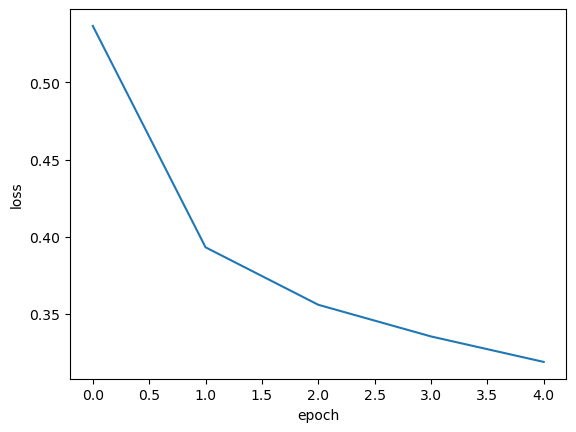

In [118]:
# 손실 곡선
plt.figure()
plt.plot(history.history["loss"])

plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

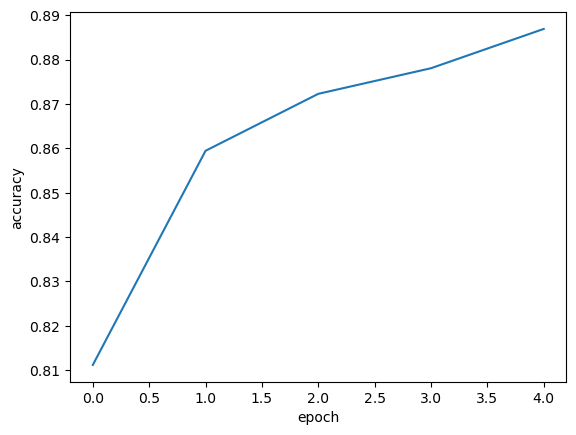

In [120]:
# 정확도 곡선
plt.figure()
plt.plot(history.history["accuracy"])

plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

In [122]:
# epoch 를 20으로 늘려서 그래프 확인
model = model_fn()
model.compile(loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
history = model.fit(scaled_train, y_train, epochs = 20)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 999us/step - accuracy: 0.7659 - loss: 0.6849
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8545 - loss: 0.4052
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8692 - loss: 0.3546
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8820 - loss: 0.3288
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8857 - loss: 0.3187
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8874 - loss: 0.3075
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8959 - loss: 0.2898
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8997 - loss: 0.2778
Epoch 9/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9006 - loss: 0.2743
Epoch 10/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9051 - loss: 0.2673
Epoch 11/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9076 - loss: 0.2665
Epoch 12/20
1500/1500 ━━━━━━

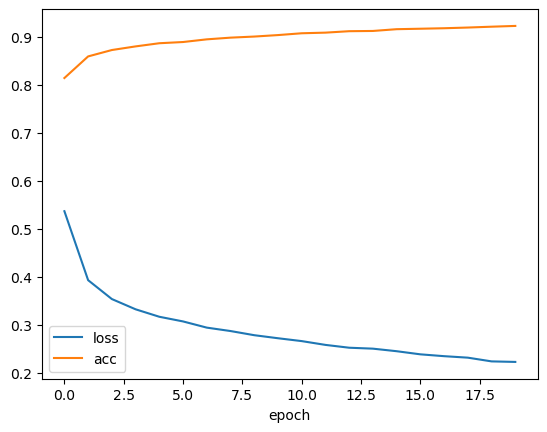

In [124]:
plt.figure()
plt.plot(history.history["loss"], label = "loss")
plt.plot(history.history["accuracy"], label = "acc")

plt.legend()
plt.xlabel("epoch")
plt.show()

# 검증 손실

- 에포크에 따른 과대적합과 과소적합을 파악하려면 검증 세트에 대한 점수도 파악해야함
- 케라스에서는 fit() 메서드에 검증 데이터를 전달할 수 있음

In [127]:
model = model_fn()
model.compile(loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [129]:
history = model.fit(scaled_train, y_train, epochs = 20, validation_data = (scaled_val, y_val))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7641 - loss: 0.6685 - val_accuracy: 0.8537 - val_loss: 0.4110
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8570 - loss: 0.3981 - val_accuracy: 0.8646 - val_loss: 0.3835
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8737 - loss: 0.3544 - val_accuracy: 0.8695 - val_loss: 0.3694
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8793 - loss: 0.3351 - val_accuracy: 0.8803 - val_loss: 0.3429
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8846 - loss: 0.3170 - val_accuracy: 0.8800 - val_loss: 0.3477
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8885 - loss: 0.3074 - val_accuracy: 0.8782 - val_loss: 0.3520
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8950 - loss: 0.2926 - val_accuracy: 0.8841 - val_loss: 0.3478
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8964 - loss: 0.2864 - 

In [131]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


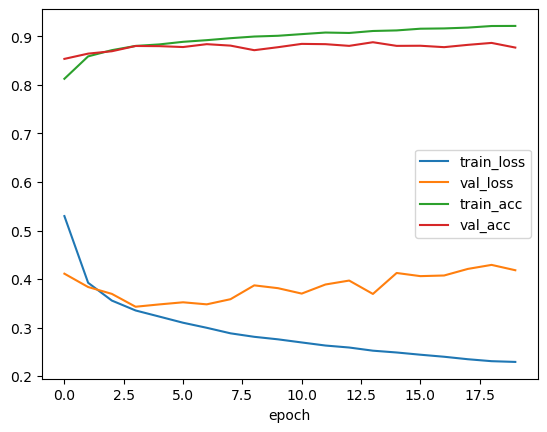

In [133]:
plt.figure()
plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.xlabel("epoch")
plt.legend()
plt.show()

- 훈련 손실은 계속 감소하는데 검증 손실은 감소하다가 상승하여 과대적합 모델이 만들어짐
    - 검증 손실이 상승하는 시점을 가능한한 뒤로 늦출 필요가 있음

In [136]:
# Adam 옵티마이저 선택
model = model_fn()
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [138]:
history = model.fit(scaled_train, y_train, epochs = 20, validation_data = (scaled_val, y_val), batch_size = 32)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7678 - loss: 0.6626 - val_accuracy: 0.8340 - val_loss: 0.4357
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8556 - loss: 0.4025 - val_accuracy: 0.8680 - val_loss: 0.3678
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8710 - loss: 0.3604 - val_accuracy: 0.8657 - val_loss: 0.3725
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8808 - loss: 0.3302 - val_accuracy: 0.8748 - val_loss: 0.3440
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8860 - loss: 0.3103 - val_accuracy: 0.8798 - val_loss: 0.3369
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8905 - loss: 0.2989 - val_accuracy: 0.8764 - val_loss: 0.3366
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8964 - loss: 0.2830 - val_accuracy: 0.8764 - val_loss: 0.3476
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9004 - loss: 0.2702 - 

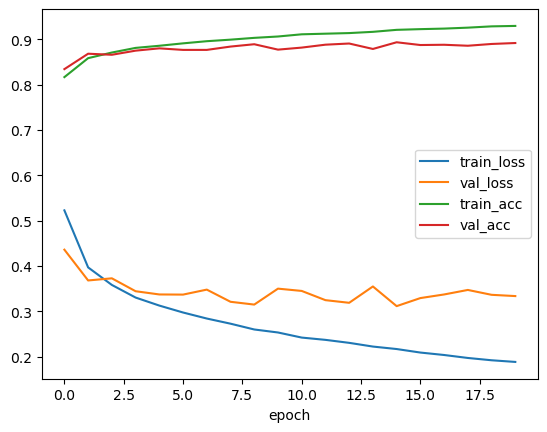

In [140]:
plt.figure()
plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.xlabel("epoch")
plt.legend()
plt.show()

- RMSprop을 사용할 때보다 검증 손실 그래프의 감소 추세가 길게 이어지고 있어 Adam 옵티마이저가 이 데이터셋에 잘 맞는 것으로 보임

# 드롭아웃(dropout)

<img src="./image/dropout.png" height="500"/>

- 훈련 과정에서 층의 일부 유닛을 랜덤하게 끄는 것으로(출력을 0으로 만드는 것으로) 과대적합을 방지
    - 특정 유닛에 과대하게 의존하는 것을 줄일 수 있음
    - 일부 유닛의 출력이 없을 수 있다는 것을 감안하여 학습하게 됨
        - 모든 입력값에 대해 충분한 주의를 기울이는 방향으로 학습
- 드롭아웃은 케라스에서 Dropout 클래스로 제공
- 특정 층 뒤에 드롭아웃을 두어 해당 층의 출력을 랜덤하게 0으로 만듦
- Flatten 과 마찬가지로 층처럼 사용되지만 훈련되는 모델 파라미터가 없음

In [145]:
model = model_fn(keras.layers.Dropout(0.3))    # 30%를 드롭아웃
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_13 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

- 드롭아웃 층은 입력과 출력의 크기가 같음
    - 일부 유닛의 출력을 0으로 만들지만 전체 출력 배열의 크기를 바꾸지 않음
- 모델 훈련이 끝난 후에 평가나 예측을 수행할 때는 드롭아웃을 적용하지 않아야 함
    - 훈련된 모든 유닛을 사용해야 올바른 예측을 수행할 수 있기 때문에
    - 케라스에서는 모델을 평가와 예측에 사용할 때에는 자동으로 드롭아웃을 적용하지 않음

In [148]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [150]:
history = model.fit(scaled_train, y_train, epochs = 20, validation_data = (scaled_val, y_val), batch_size = 32)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7249 - loss: 0.7756 - val_accuracy: 0.8439 - val_loss: 0.4258
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8351 - loss: 0.4635 - val_accuracy: 0.8555 - val_loss: 0.3920
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8481 - loss: 0.4167 - val_accuracy: 0.8606 - val_loss: 0.3762
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8605 - loss: 0.3874 - val_accuracy: 0.8650 - val_loss: 0.3555
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8683 - loss: 0.3674 - val_accuracy: 0.8770 - val_loss: 0.3380
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8706 - loss: 0.3549 - val_accuracy: 0.8712 - val_loss: 0.3490
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8694 - loss: 0.3509 - val_accuracy: 0.8712 - val_loss: 0.3387
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8778 - loss: 0.3354 - 

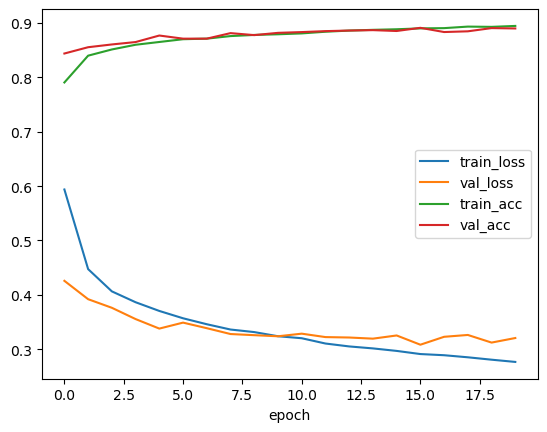

In [152]:
plt.figure()
plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.xlabel("epoch")
plt.legend()
plt.show()

- 앞선 방법들에 비해 loss와 acc가 비교적 일정하게 유지됨

# 모델 저장과 복원

- 나중에 다시 사용하기 위해서 모델을 저장
- 케라스 모델은 모델의 파라미터를 저장하는 save_weights() 메서드를 제공
- 모델 구조와 모델 파라미터를 저장하는 save() 메서드도 제공

In [156]:
# 모델의 파라미터를 저장
model.save_weights("./model/model.weights.h5")

In [158]:
# 모델 구조와 모델 파라미터를 저장
model.save("./model/model-whole.keras")

## 모델 파라미터만 읽어오기

In [161]:
weights_model = model_fn(keras.layers.Dropout(0.3))    # 저장했던 모델과 정확히 같은 구조의 모델 생성

In [163]:
weights_model.load_weights("./model/model.weights.h5")

- load_weights() 메서드를 사용하려면 save_weights() 로 저장했던 모델과 정확히 같은 구조를 가져야함
- 모델 파라미터를 읽어온 모델은 evaluate() 을 사용하기 전에 compile() 을 반드시 실행해야 함

In [166]:
val_labels = np.argmax(weights_model.predict(scaled_val), axis = -1)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step


In [168]:
print(val_labels)

[0 3 7 ... 4 6 2]


In [170]:
print(y_val)

[0 3 7 ... 4 6 2]


In [172]:
print(np.mean(val_labels == y_val))

0.89


- 케라스의 predict() 메서드는 모델의 예측을 수행
    - 종속변수가 10개의 클래스로 이루어졌기 때문에 각 클래스에 대한 확률을 반환
- predict() 결과에서 가장 큰 값을 고르기 위해 argmax() 함수를 사용
    - 배열에서 가장 큰 값의 인덱스를 반환
    - 몇 번째 클래스에 대한 확률값이 가장 큰 지 반환
        - 몇 번째 클래스로 예측했는지 알 수 있음 
- argmax() 함수의 axis = -1 은 배열의 마지막 차원을 따라서 최댓값을 고름
    - axis = 1 이면 열을 따라 각 행의 최댓값의 인덱스를 선택
    - axis = 0 이면 행을 따라 각 열의 최댓값의 인덱스를 선택
- argmax() 로 고른 인덱스와 타깃 인덱스를 비교하여 같으면 1, 다르면 0
    - 위 값의 평균을 구하면 정확도가 됨

## 모델 전체 읽어오기

In [176]:
whole_model = keras.models.load_model("./model/model-whole.keras")

In [178]:
whole_model.evaluate(scaled_val, y_val)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - accuracy: 0.8869 - loss: 0.3305


[0.3206278681755066, 0.8899999856948853]

# 콜백(callback)

- 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체
- fit() 메서드의 callbacks 매개변수에 리스트로 전달하여 사용

## ModelCheckpoint 콜백

- 최상의 검증 점수를 만드는 모델을 저장

In [182]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/best-model.keras", save_best_only = True)

In [184]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [186]:
history = model.fit(scaled_train, y_train, epochs = 20, validation_data = (scaled_val, y_val), callbacks = [checkpoint_cb], batch_size = 32)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7281 - loss: 0.7773 - val_accuracy: 0.8398 - val_loss: 0.4244
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8393 - loss: 0.4430 - val_accuracy: 0.8538 - val_loss: 0.3973
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8533 - loss: 0.4069 - val_accuracy: 0.8687 - val_loss: 0.3552
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8570 - loss: 0.3925 - val_accuracy: 0.8668 - val_loss: 0.3538
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8632 - loss: 0.3711 - val_accuracy: 0.8692 - val_loss: 0.3515
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8714 - loss: 0.3484 - val_accuracy: 0.8770 - val_loss: 0.3347
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8738 - loss: 0.3426 - val_accuracy: 0.8764 - val_loss: 0.3407
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8760 - loss: 0.3331 - 

- 모델이 훈련한 후에 best-model.keras 에 최상의 val_loss 를 낸 모델이 저장됨

In [189]:
best_model = keras.models.load_model("./model/best-model.keras")

In [191]:
best_model.evaluate(scaled_val, y_val)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - accuracy: 0.8870 - loss: 0.3240


[0.315611332654953, 0.8889999985694885]